# Regression

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [3]:
import pandas as pd
data = pd.read_csv('real_estate.csv')
data.head(6)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1


The data consists of the following variables:

- **transaction_date** - 2013.500 means 2013 with a fraction of 0.500, which corresponds to 6 months (June)
- **house_age** - (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - within walking distance
- **latitude** - 
- **longitude** - 
- **price_per_unit** - per unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.



Training Set: 331 rows
Test Set: 83 rows
LinearRegression()


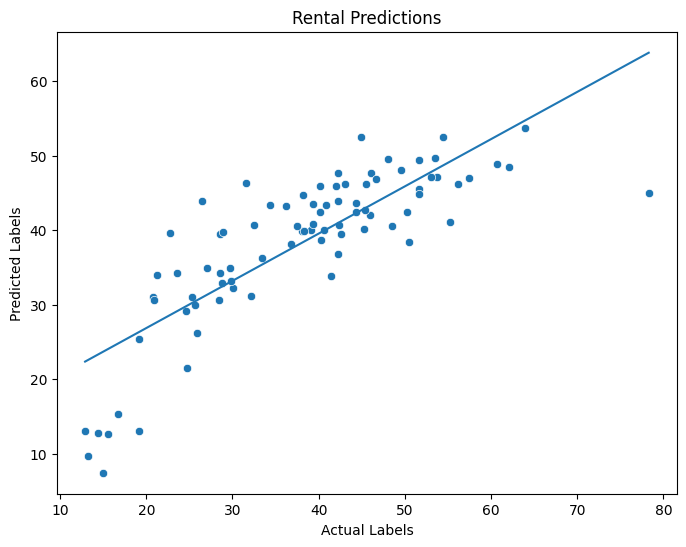

MSE: 59.522435319024204
RMSE: 7.715078438941772
R2: 0.6573242742218073


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('real_estate.csv')
data.head()

X, y = data[['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values,data['price_per_unit'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

model = LinearRegression().fit(X_train, y_train)
print(model)

predictions = model.predict(X_test)
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x = y_test, y = predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Rental Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
sns.lineplot(x = y_test,y = p(y_test))
plt.show()

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 80, random_state = 0)

regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 48.21716538476116
RMSE: 6.943858105171876
R2: 0.7224096753664034


In [14]:
from IPython.display import Image, display, HTML
image_path = 'formula-MAE-MSE-RMSE-RSquared.JPG'
image_style = "width:300px; margin:auto;"
display(HTML(f'<img src="{image_path}" style="{image_style}">'))

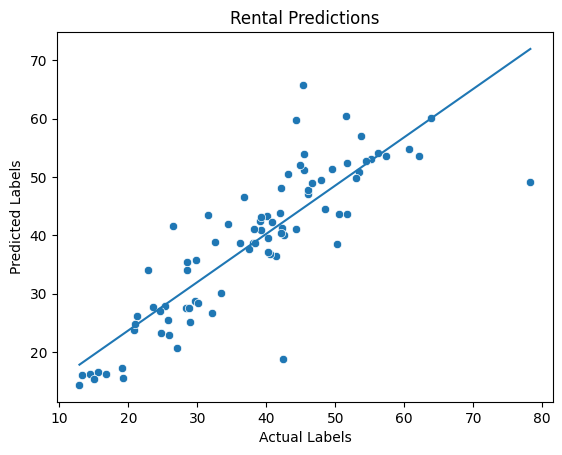

In [15]:
sns.scatterplot(x = y_test, y = predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Rental Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # linear model
p = np.poly1d(z)
sns.lineplot(x = y_test,y = p(y_test))
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [16]:
X1 = [2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348]
X2 = [2013.000, 13.6, 4082.015, 0, 24.94155, 121.50381]

Xnew = [X1, X2]
ynew = regressor.predict(Xnew)
ynew

array([48.755     , 15.84208333])